In [9]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-whitegrid')

df = pd.read_csv('data/seeds.csv')

dv = 'compactness'
iv = 'variety'
df.groupby(iv).mean()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length
variety,,,,,,,
Canadian,11.873857,13.247857,0.849409,5.229514,2.853771,4.788400,5.116400
Kama,14.334429,14.294286,0.880070,5.508057,3.244629,2.667403,5.087214
Rosa,18.334286,16.135714,0.883517,6.148029,3.677414,3.644800,6.020600


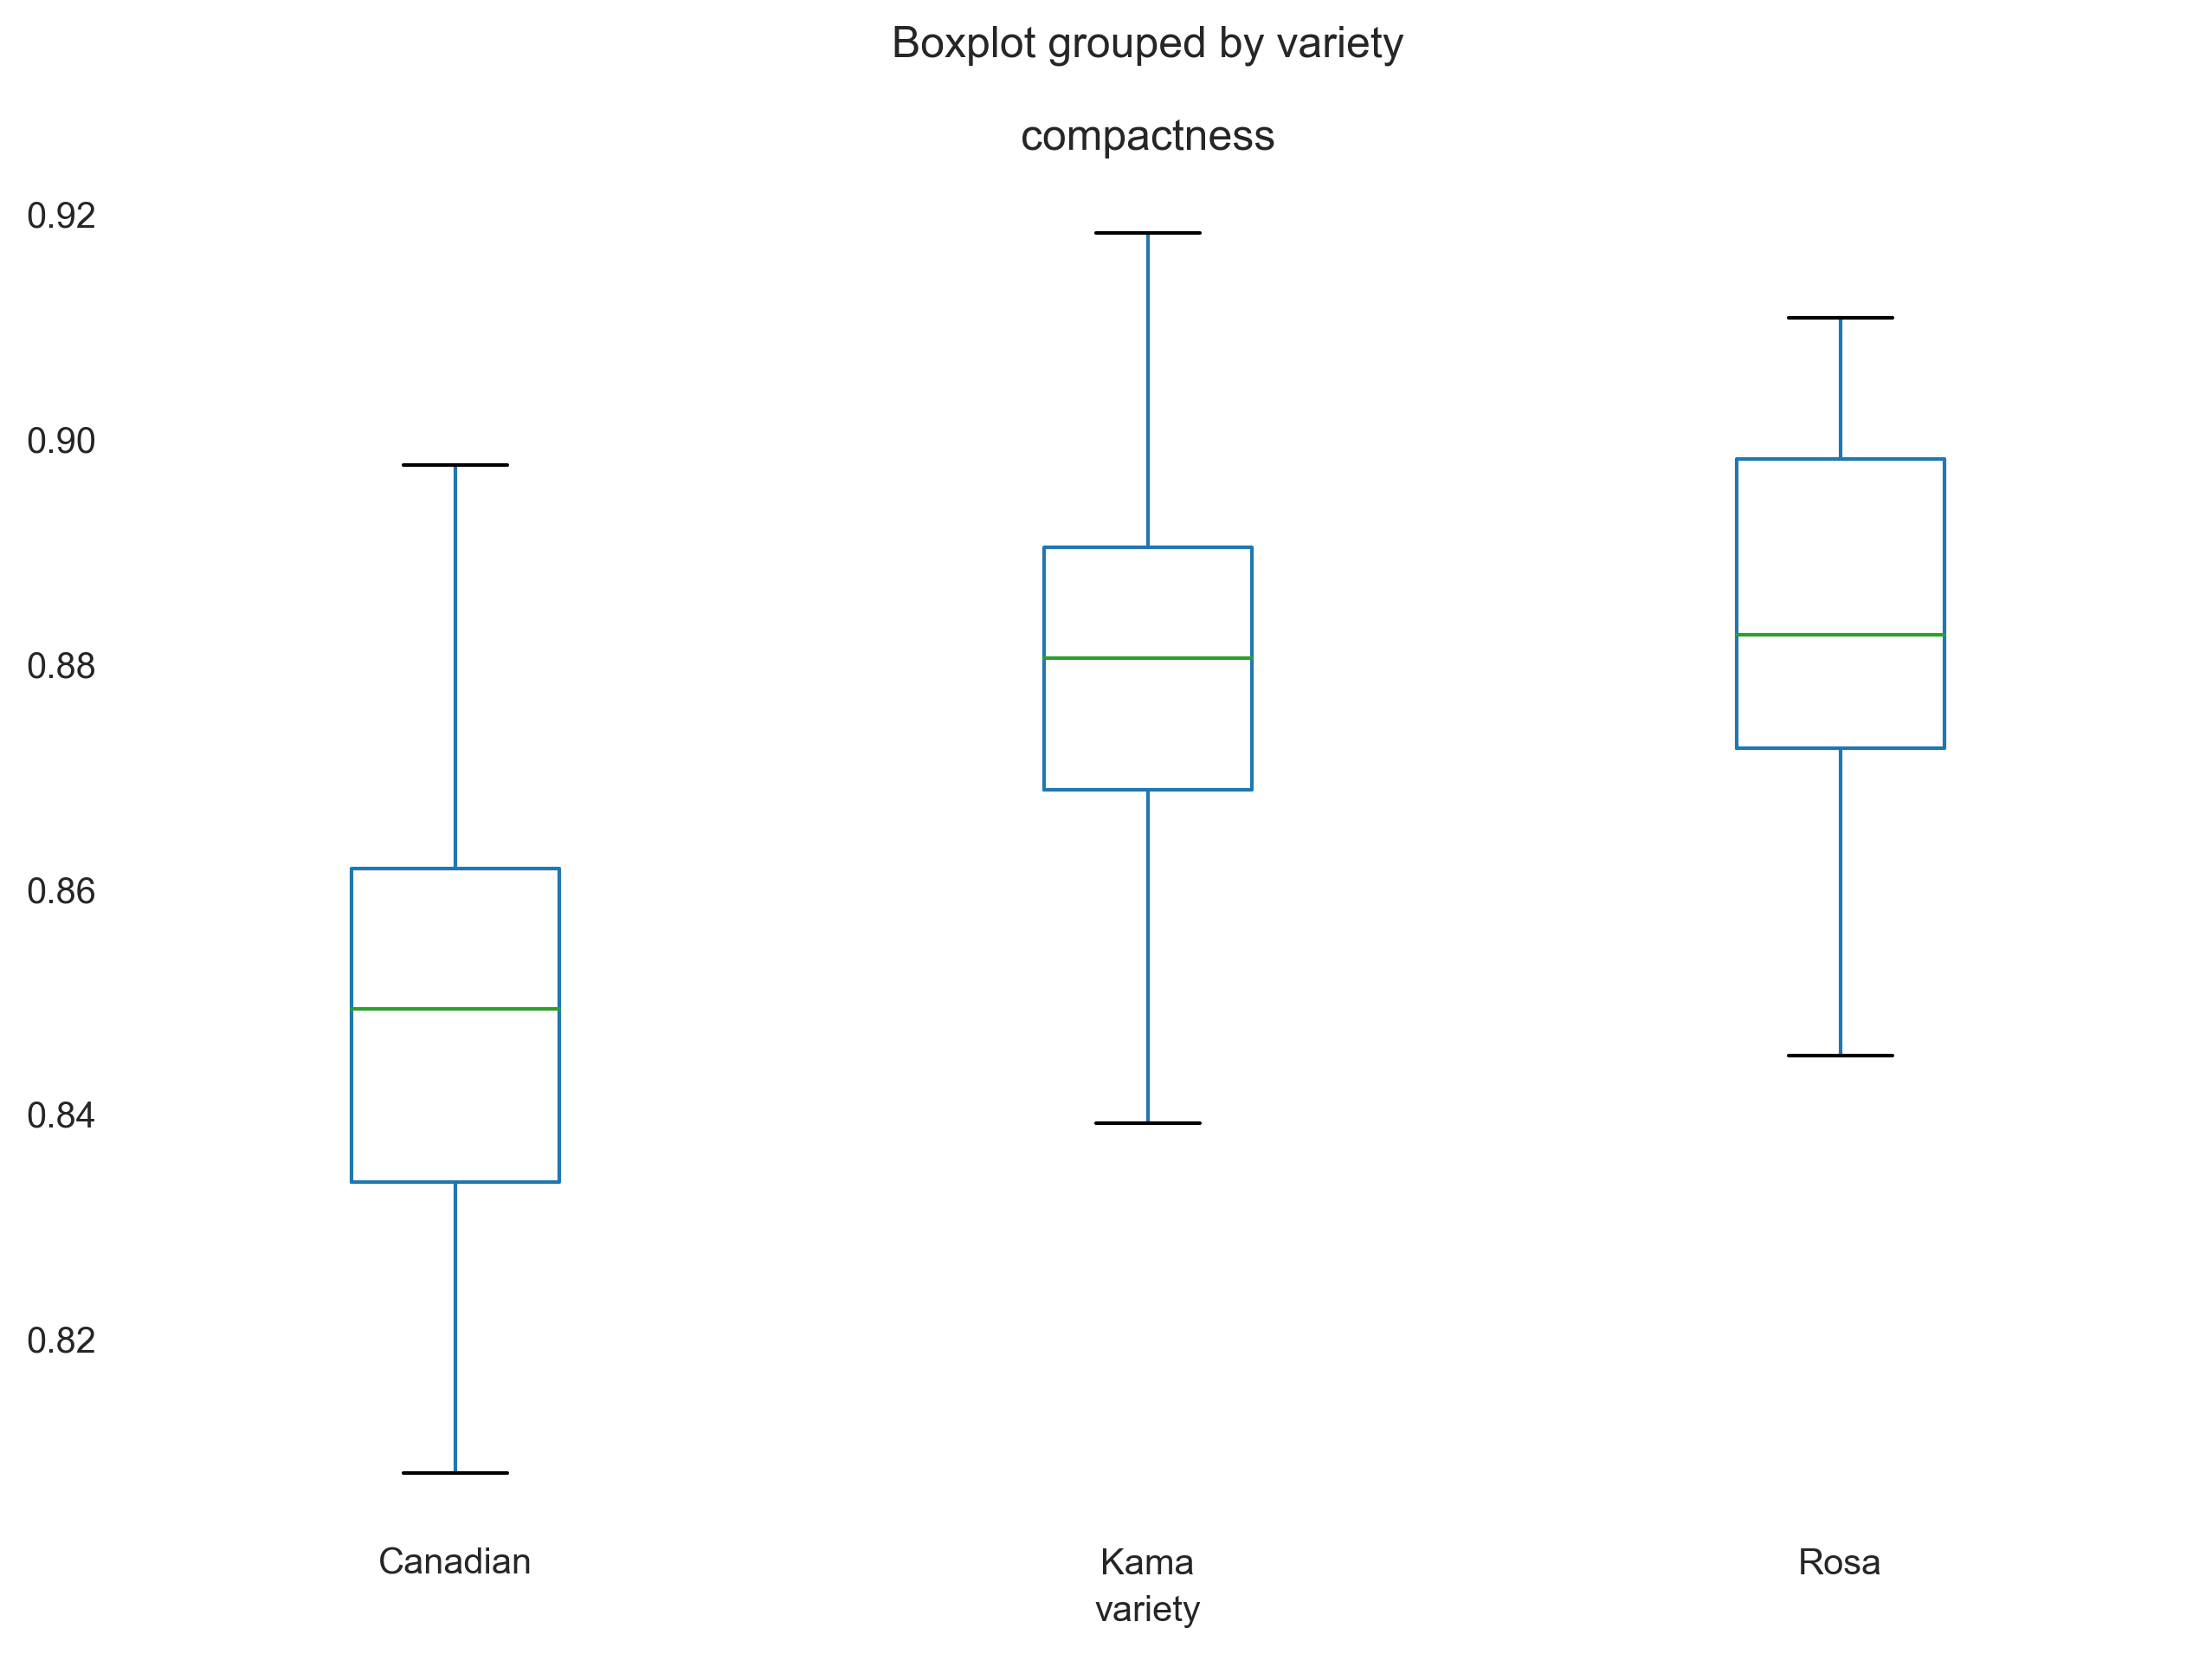

In [10]:
df.boxplot(column = dv, by = iv, figsize = (10,7), grid = False)

plt.box(False)
plt.show()

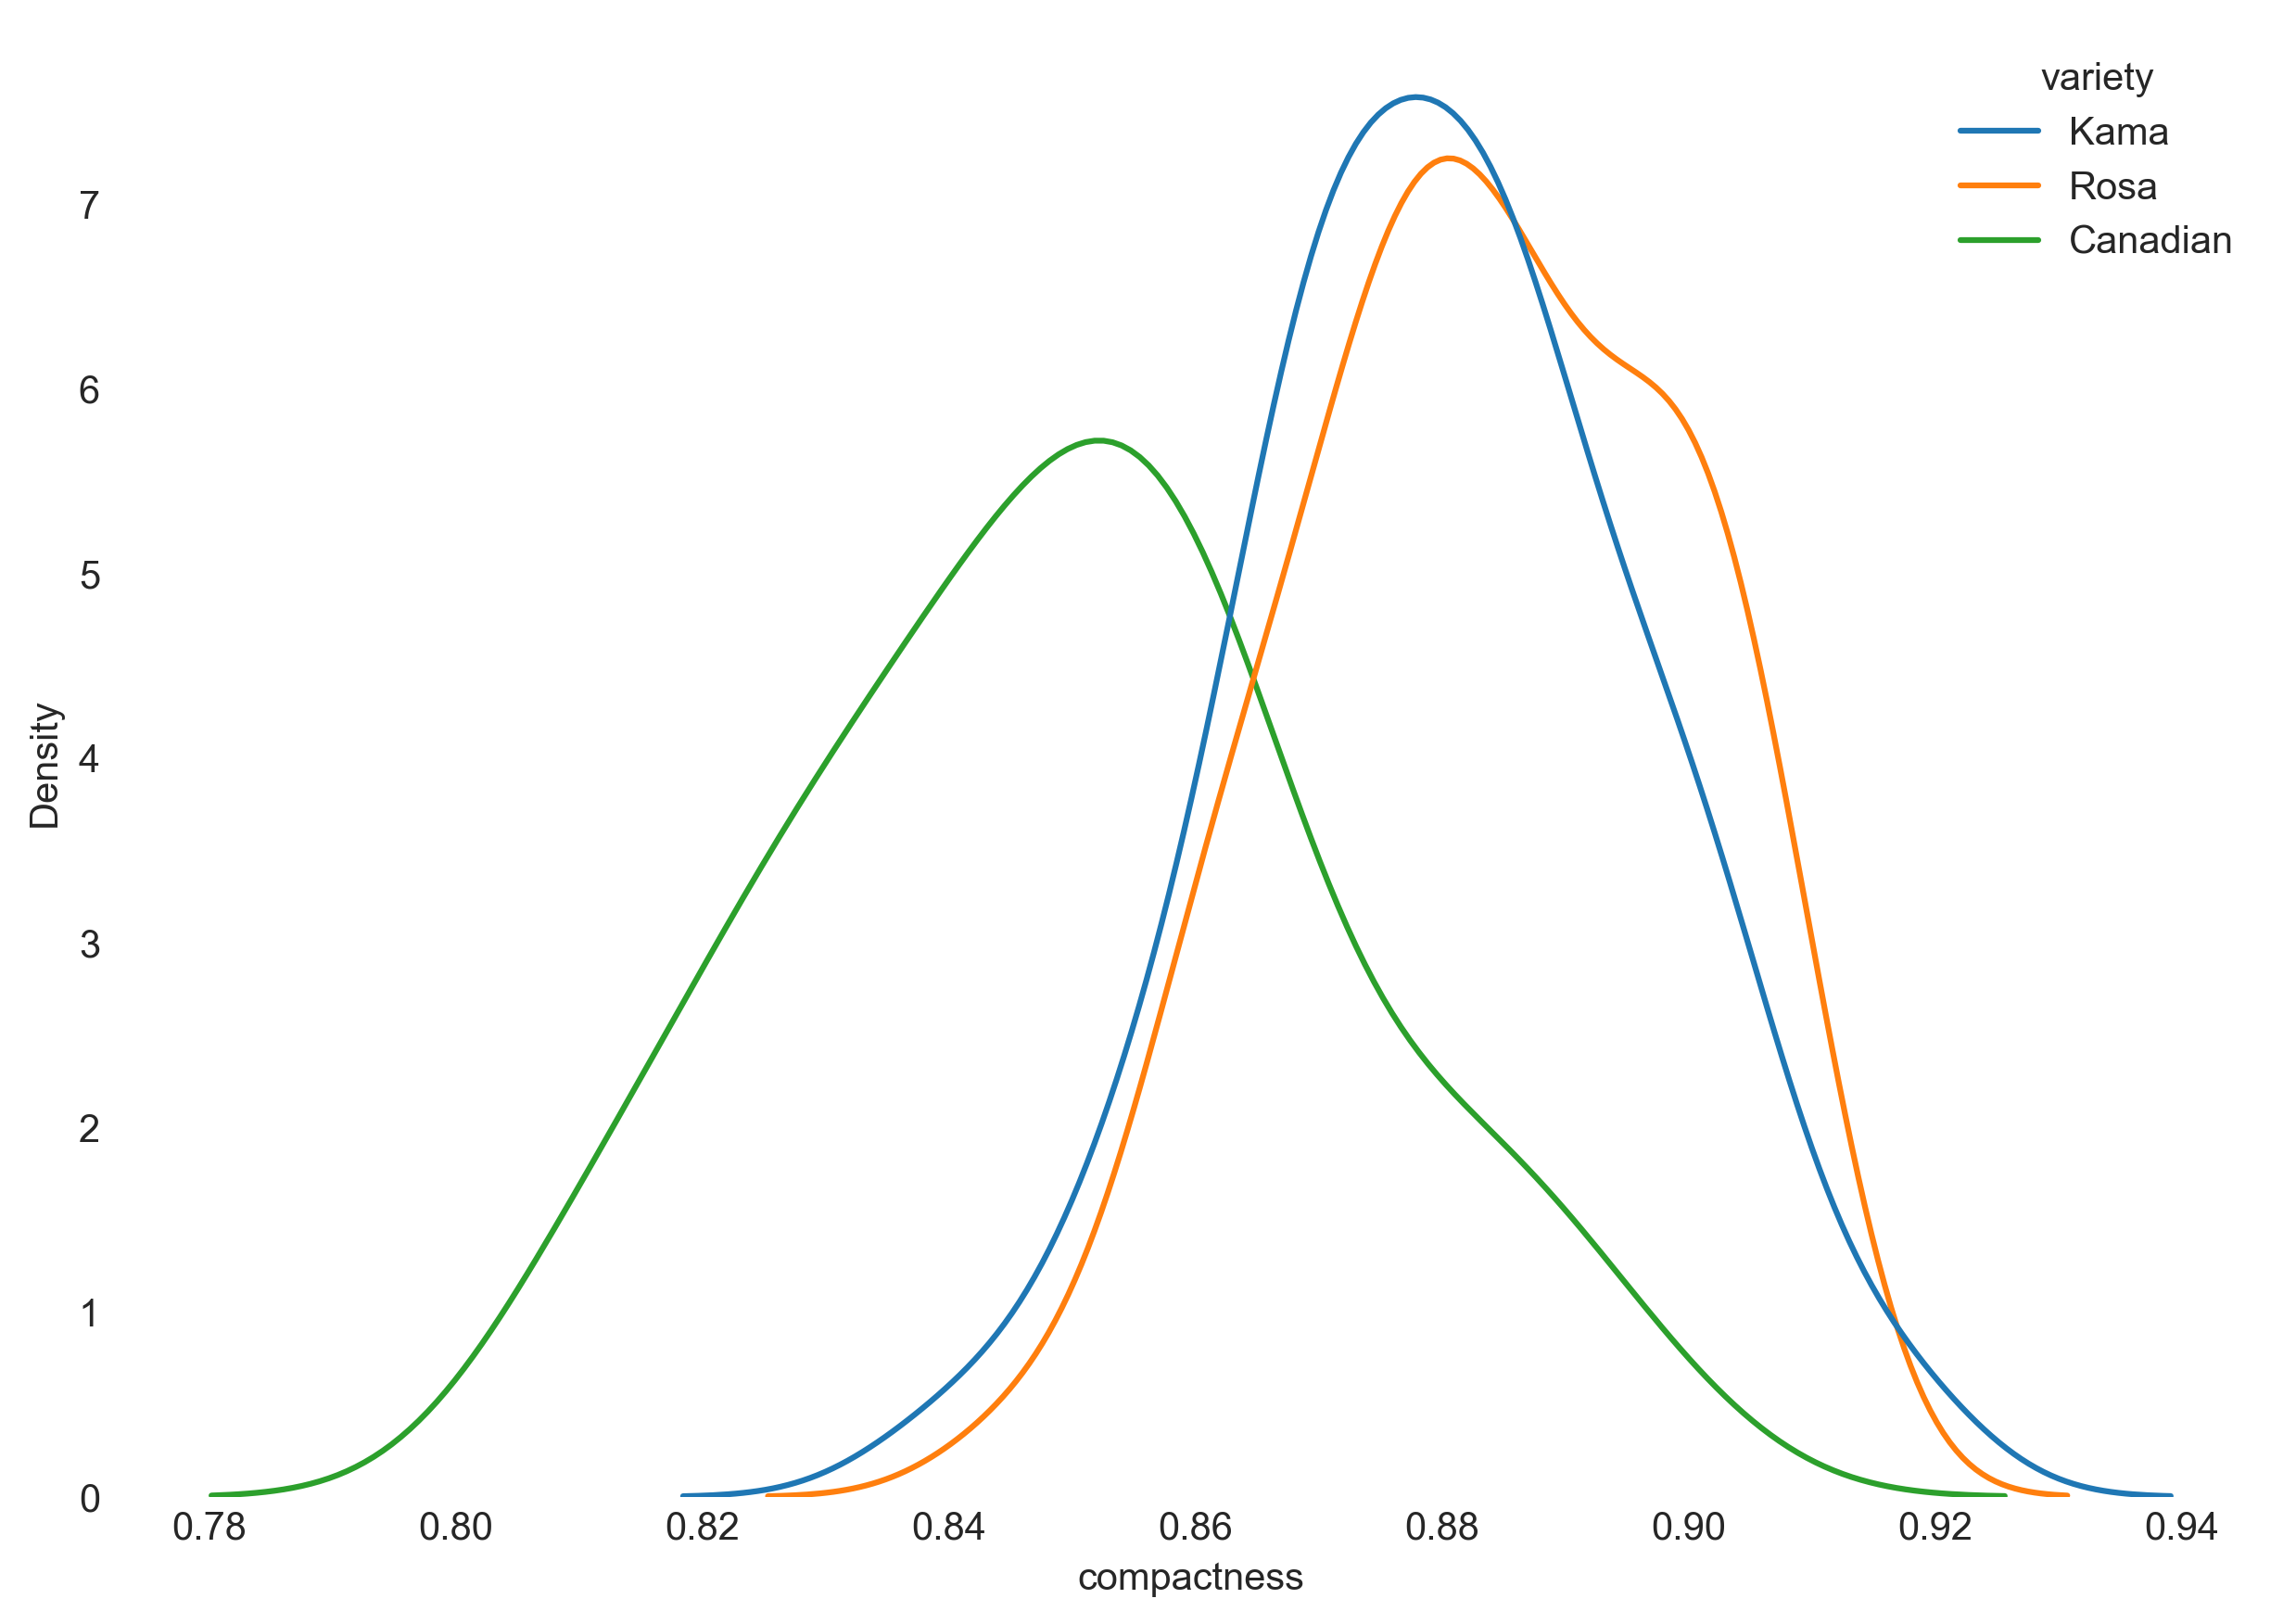

,W,pval,normal
Kama,0.994840,0.993686,True
Rosa,0.977011,0.225145,True
Canadian,0.984481,0.539685,True


In [11]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.grid(False)
ax.set_frame_on(False)

sns.kdeplot(data = df, x = dv, hue = iv, palette = 'tab10',
            fill = False, ax = ax)
plt.show()

pg.normality(df, dv = dv, group = iv, method = 'shapiro')

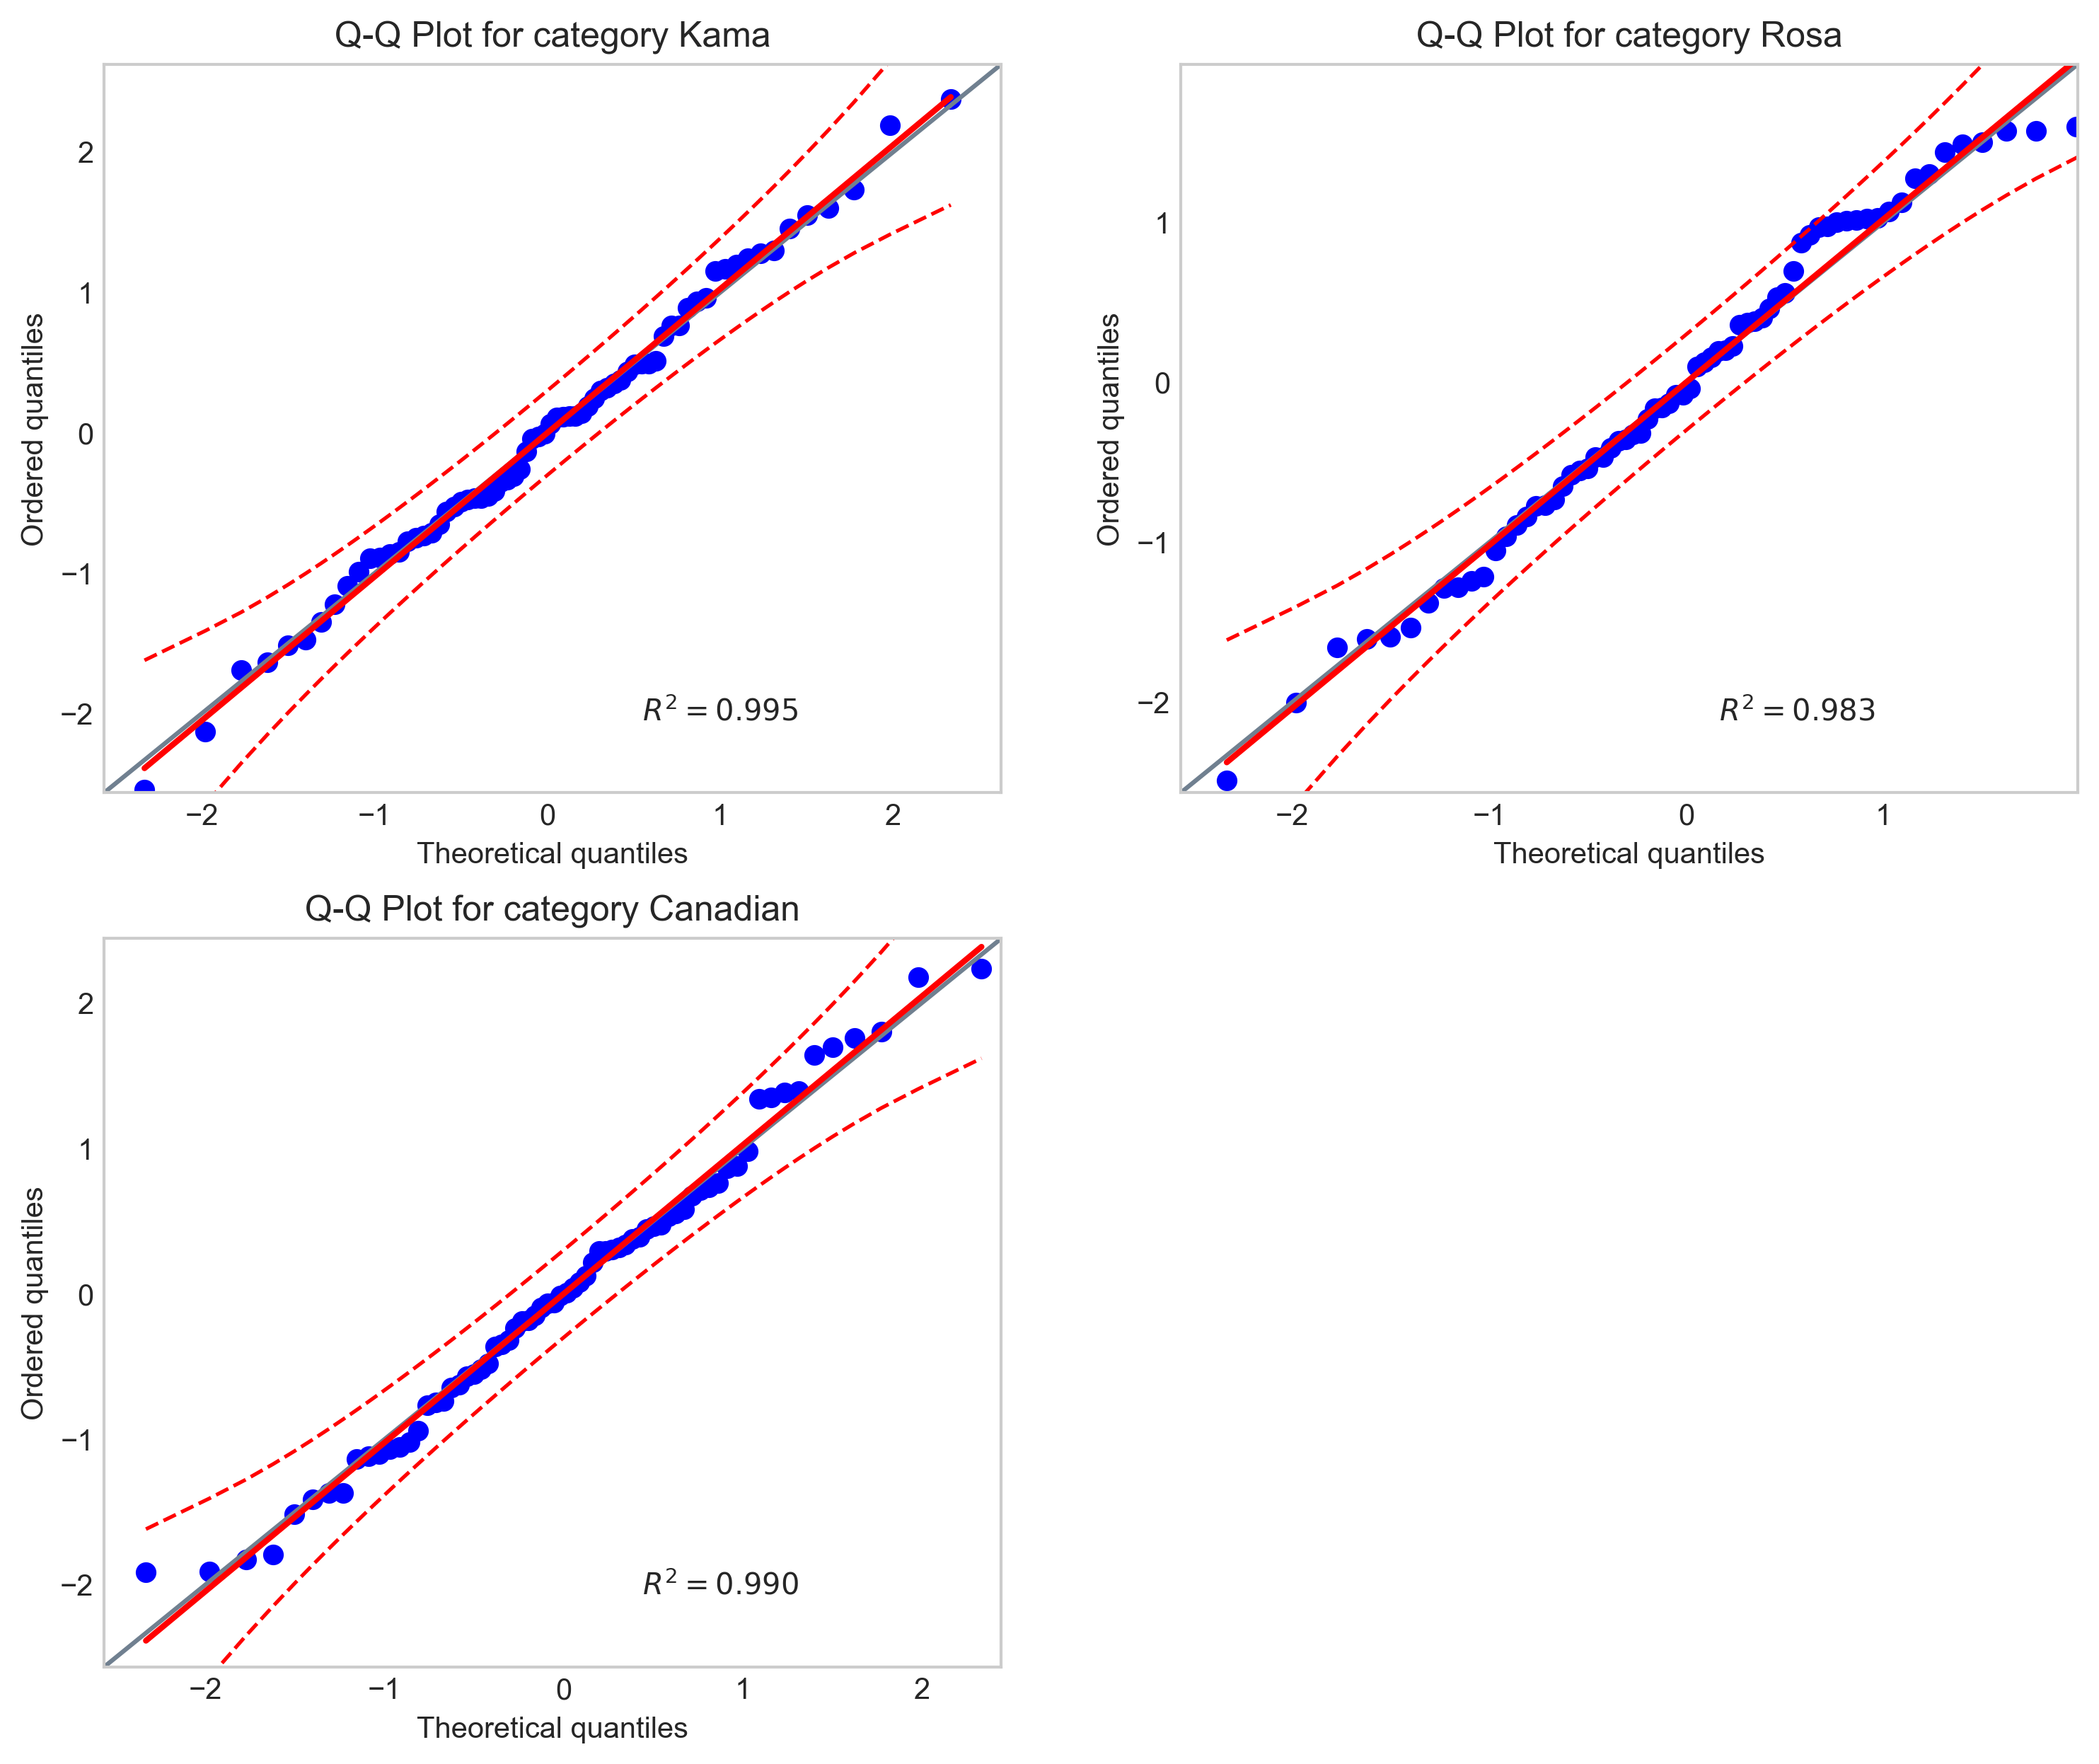

In [12]:
fig, axes = plt.subplots(2, 2, figsize = (12, 10))
axes[1,1].set_axis_off()

categories = df[iv].unique()
for ax, cat in zip(axes.flatten(), categories):
    mask = df[iv] == cat
    sample = df.loc[mask, dv]
    pg.qqplot(sample, ax = ax)
    ax.set_title(f"Q-Q Plot for category {cat}")
    ax.grid(False)


In [13]:
pg.homoscedasticity(df, dv = dv, group = iv, method = 'levene')

,W,pval,equal_var
levene,4.319675,0.014524,False


In [14]:
df_anova = pg.welch_anova(df, dv = dv, between = iv)
df_anova

,Source,ddof1,ddof2,F,p-unc,np2
0,variety,2,135.594314,62.104728,7.141897e-20,0.422977


In [15]:
pg.pairwise_gameshowell(df, dv = dv, between = iv)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Canadian,Kama,0.849409,0.880070,-0.030661,0.003242,-9.458283,127.478774,0.000000,-1.590037
1,Canadian,Rosa,0.849409,0.883517,-0.034109,0.003193,-10.681806,124.685783,0.000000,-1.795724
2,Kama,Rosa,0.880070,0.883517,-0.003447,0.002679,-1.286722,137.738395,0.405059,-0.216311


In [16]:
power = pg.power_anova(eta_squared = float(df_anova['np2']),
                       k = 3, n = 70, alpha = 0.05)

print(f"Statistical power is {power}")

Statistical power is 1.0
